# Homework 5 
## Anna Tigranyan

**Dataset**<br>
netflix_titles.csv
<br><br>
**About** 	 	 		
<br>
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.<br><br>				

**Metadata**	<br>			
**Show_id** - id of a movie or tv show<br>      
**title** - title name <br>
**director** - director name<br>
**cast**  - cast names<br>       
**country**  - country name<br> 
**date_added**  - release date<br>
**release_year**  - release year<br>
**rating**  - rating<br>
**duration**  - duration of a movie/tv shows<br>
**listed_in** -  in which category a movie/series belongs to<br>
**description** - description in few words<br>
<br><br>

**Business questions**<br><br>
**1.** In which year did Netflix release the most tv shows or movies? Use a line chart, visualize with seaborn figure level and axis level approaches. (1 point)<br><br>

**2.** Which movies/tv shows are popular (use rating) by year. Use stacked bar charts, visualize with seaborn figure level and axis level approaches. Have separate visualizations for movies and tv shows. (1 point)<br><br>


**3.** Which countries are the most popular ones? Visualize with seaborn figure level and axis level approaches. (1 point)<br><br>



**4.** Is there a correlation between duration and rating? Consider movie duration and tv show duration separately. Use a scatter plot. Visualize with seaborn figure level and axis level approaches. (1 point)<br><br>


**5.** Distribute movie duration? What is the average duration ?(be attentive while choosing the statistic to present the average). Use histogram,  box plot. Visualize with seaborn figure level and axis level approaches. (1 point)<br><br>

**6.** Find at least 5 more insights. Visualize with seaborn figure level OR axis level approach (3 points). <br><br>

**7.** Have a final summary of your insights. Based on your insights, write suggestions to the Netflix business team. Help them to make better decisions based on your suggestions. (2 points)  <br><br>


In [109]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_csv(r'netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. In which year did Netflix release the most tv shows or movies? Use a line chart, visualize with seaborn figure level and axis level approaches. (1 point)

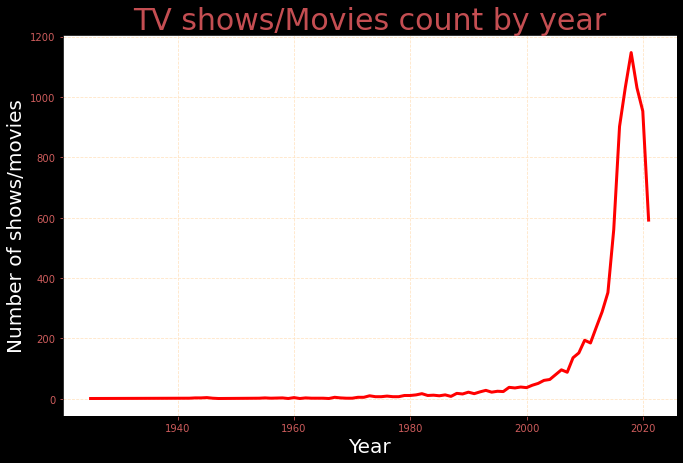

In [3]:
y = df['show_id'].groupby(df['release_year']).count().reset_index() # counting movies/tvshows by year

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k','axes.grid': True,
                     'axes.labelcolor': 'white','figure.facecolor': 'k','grid.color': 'bisque',
                     'grid.linestyle': '--','axes.spines.right': True,
                      'ytick.color': 'indianred','xtick.color': 'indianred'}):
    
    fig, ax = plt.subplots(figsize=(11, 7))
    
    #lineplot
    sns.lineplot(data=y,x='release_year',y='show_id',color='red',linewidth=3)
    
    #Increasing tick label font size
    sns.set(font_scale = 1)

    ax.set_ylabel('Number of shows/movies',size=20)
    ax.set_xlabel('Year',size=20)
    ax.set_title('TV shows/Movies count by year',color='r',fontsize = 30)
    ;


In [4]:
y.loc[y['show_id'] == y['show_id'].max()] # to get year with max number of TV shows/ movies

,release_year,show_id
70,2018,1147


 Netflix released the most tv shows or movies in **2018** (1147 tv shows/movies).

# 2.Which movies/tv shows are popular (use rating) by year. Use stacked bar charts, visualize with seaborn figure level and axis level approaches. Have separate visualizations for movies and tv shows. (1 point)

In [111]:
# Separating data by Movies and TV shows
is_movie =  df.loc[df['type'] == 'Movie']
is_show =  df.loc[df['type'] == 'TV Show']

# counting ratings by year
m = is_movie['release_year'].groupby(is_movie['rating']).count()
s = is_show['release_year'].groupby(is_show['rating']).count()

# merge m and s in order to have dataset containing rating name and number of tv shows and movies for that rating
df2 = pd.merge(m, s, how='outer',on = 'rating')

# mark nans as 0
df2['release_year_y'] = df2['release_year_y'].replace(np.nan, 0)

Text(0.5, 1.0, 'Counts of ratings by year(tv shows) ')

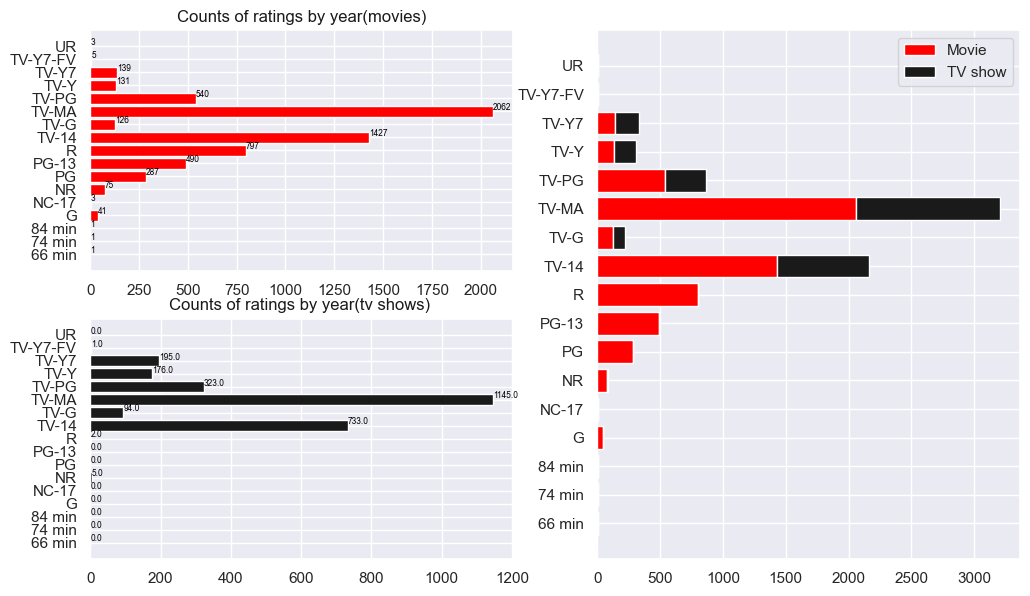

In [137]:
    sns.set(font_scale = 1)
    
    labels=[]
    for j in df2.index:
        labels.append(j)

    fig, ax = plt.subplot_mosaic([['upleft', 'right'],
                                   ['lowleft', 'right']],
                                   figsize=(12,7),dpi=100)
    #plots
    ax['upleft'].barh(labels, df2['release_year_x'], color = 'red')

    ax['lowleft'].barh(labels, df2['release_year_y'], color = 'k')

    ax['right'].barh(labels, df2['release_year_x'], color = 'red')
    ax['right'].barh(labels, df2['release_year_y'],left=df2['release_year_x'],color = 'k')

    # Adding legend to right plot
    ax['right'].legend(['Movie','TV show'])

    # Adding annotation to bars
    for a in ax['upleft'].patches:
        ax['upleft'].text(a.get_width()+0.2, a.get_y()+0.5,
             str(round((a.get_width()), 2)),
                 fontsize = 6,color ='black')

    for b in ax['lowleft'].patches:
         ax['lowleft'].text(b.get_width()+0.2, b.get_y()+0.5,
              str(round((b.get_width()), 2)),
                 fontsize = 6,color ='black') 

    # titles and lebels
    ax['upleft'].set_title(f'Counts of ratings by year(movies)',fontsize = 12, color = 'k')
    ax['lowleft'].set_title(f'Counts of ratings by year(tv shows) ',fontsize = 12, color = 'k')
;

# 3.Which countries are the most popular ones? Visualize with seaborn figure level and axis level approaches. (1 point)

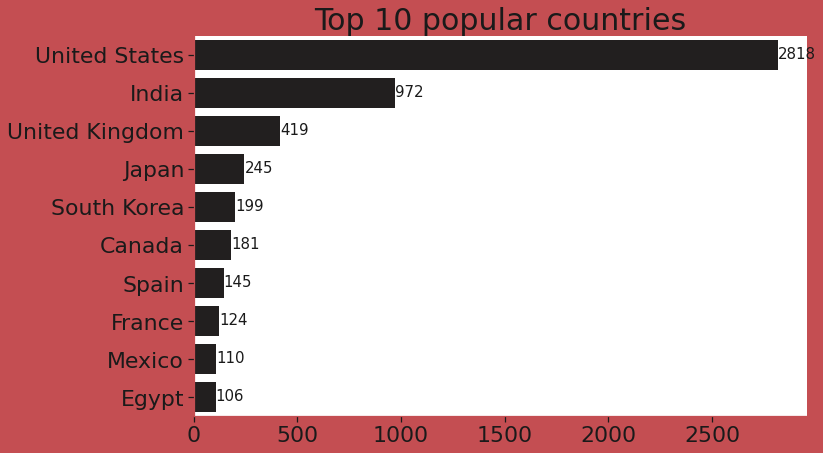

In [9]:
with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'r',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'k','ytick.color': 'k','axes.spines.right': False,
                      'axes.spines.top': False,'figure.facecolor': 'r'}):
   
    fig, ax = plt.subplots(figsize=(11, 7))
    
    # Let's plot top 10 popular countries
    sns.countplot(y='country',data=df,order=df['country'].value_counts().iloc[:10].index ,color='#221f1f')
    
    # Increasing tick label font size
    sns.set(font_scale = 1)
    
    # adding values to bars
    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 popular countries',color='k',fontsize = 30)    

The most popular countrys are:<br>
1. US<br>
2. India<br>
3. UK<br>

# 4.Is there a correlation between duration and rating? Consider movie duration and tv show duration separately. Use a scatter plot. Visualize with seaborn figure level and axis level approaches. (1 point)

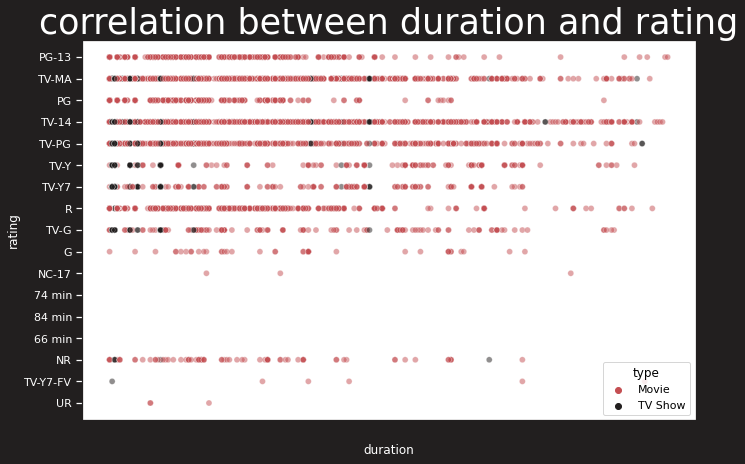

In [15]:
col = ['r','#221f1f']
with sns.axes_style({'axes.facecolor': 'white','axes.grid': False,'axes.edgecolor': '#221f1f',
                     'axes.labelcolor': 'white','figure.facecolor': '#221f1f','xtick.bottom': False,
                     'xtick.color': '#221f1f','ytick.color': 'white','axes.spines.right': True}):
    
    fig, ax = plt.subplots(figsize=(11, 7))
    sns.scatterplot(x='duration',y='rating',hue='type',alpha=0.5,data=df,palette=col)
    
    ax.set_title('correlation between duration and rating',color='white',fontsize = 35) 

Let's plot the same but this time for movies and TV shows separately:

''

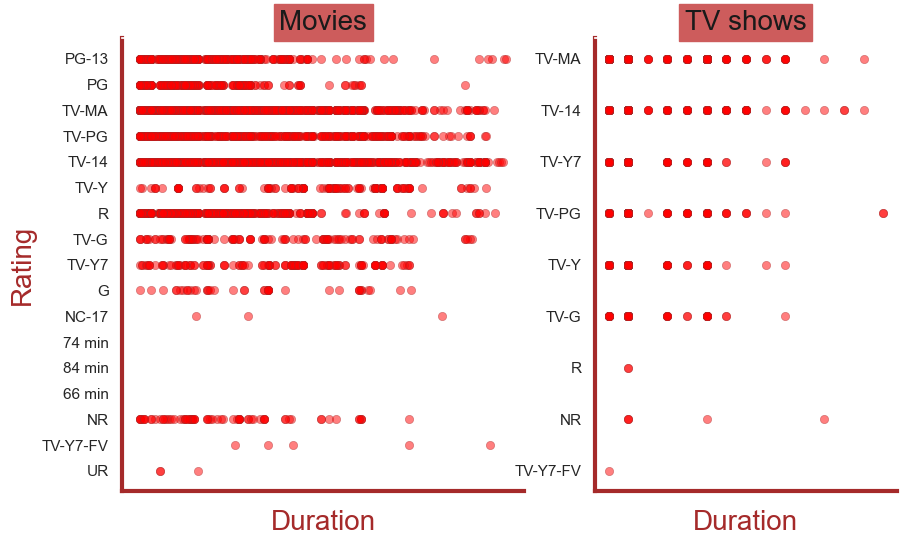

In [16]:
is_movie =  df.loc[df['type'] == 'Movie']
is_show =  df.loc[df['type'] == 'TV Show']

#Removing grid
sns.set_style("whitegrid", {'axes.grid' : False})

f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]),dpi=100)

# plot 1 for movies & plot 2 for TV shows
p1=sns.scatterplot(data=is_movie, x='duration',y='rating',
                   ax=axs[0],color='red',edgecolor='brown',linewidths=2,alpha=0.5)
p2=sns.scatterplot(data=is_show, x='duration',y='rating', ax=axs[1],color='red',
                   edgecolor='brown',linewidths=2,alpha=0.5)

# hiding x ticks for p1 and p2
p1.set(xticklabels=[])
p2.set(xticklabels=[])

# Labels & labels design
p1.set_xlabel('Duration',size=20,color='brown')
p2.set_xlabel('Duration',size=20,color='brown')
p1.set_ylabel('Rating',size=20,color='brown')
p2.set_ylabel(None)

# titles
p1.set_title('Movies',fontsize = 20, color='k',backgroundcolor ='indianred')
p2.set_title('TV shows',fontsize = 20, color='k',backgroundcolor ='indianred')

# for left plot
for axis in ['bottom','left']:
    axs[0].spines[axis].set_linewidth(3)
    axs[0].spines[axis].set_color("brown")    
for axi in ['top','right']:  
    axs[0].spines[axi].set_color(None)
    
#for right plot    
for axis in ['bottom','left']: 
    axs[1].spines[axis].set_linewidth(3)
    axs[1].spines[axis].set_color("brown")        
for axi in ['top','right']: 
    axs[1].spines[axi].set_color(None)
;

From above we see that is no significant correlation between duration and rating, but we can say that<br>
-in frist case(Movies) duration is high when we have TV-MA,TV-PG,TV-14<br>
-in second case(TV shows) duration is hogh when we have TV-MA,TV-14

# 5.Distribute movie duration? What is the average duration ?(be attentive while choosing the statistic to present the average). Use histogram, box plot. Visualize with seaborn figure level and axis level approaches. (1 point)

In [57]:
# separating data to movies and tv shows
is_movie =  df.loc[df['type'] == 'Movie']
is_show =  df.loc[df['type'] == 'TV Show']

# Let's split duration in order to have numeric data
is_movie['duration'] = df['duration'].str.split(' ', expand=True)
is_show['duration'] = df['duration'].str.split(' ', expand=True)

# chaninge type of duration column to numeric
is_movie['duration'] = pd.to_numeric(is_movie['duration'])
is_show['duration'] = pd.to_numeric(is_show['duration'])



''

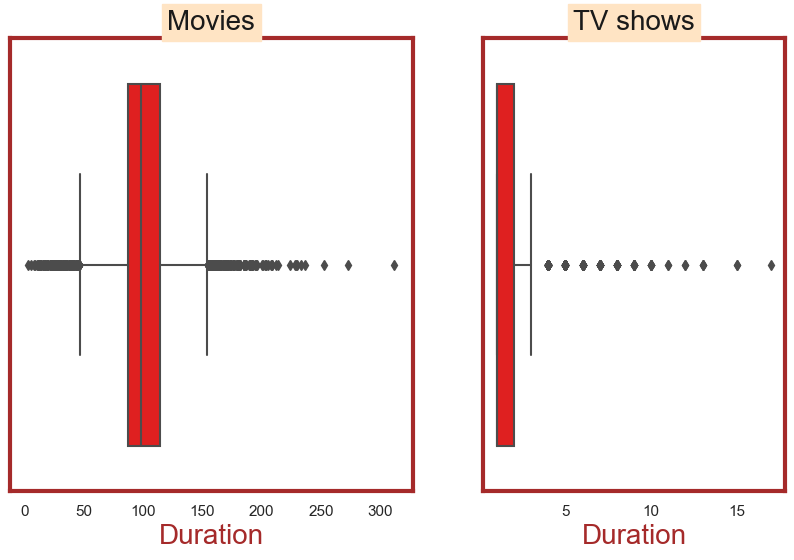

In [70]:
# Removing grid
sns.set_style("whitegrid", {'axes.grid' : False})

f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]),dpi=100)

# plot 1 for movies & plot 2 for TV shows
p1=sns.boxplot(data=is_movie, x='duration',ax=axs[0],color='red')
p2=sns.boxplot(data=is_show, x='duration',ax=axs[1],color='red')

# Labels & labels design
p1.set_xlabel('Duration',size=20,color='brown')
p2.set_xlabel('Duration',size=20,color='brown')

# titles
p1.set_title('Movies',fontsize = 20, color='k',backgroundcolor ='bisque')
p2.set_title('TV shows',fontsize = 20, color='k',backgroundcolor ='bisque')

# for left plot
for axis in ['bottom','left','top','right']:
    axs[0].spines[axis].set_linewidth(3)
    axs[0].spines[axis].set_color("brown")    
    
# for right plot    
for axis in ['bottom','left','top','right']: 
    axs[1].spines[axis].set_linewidth(3)
    axs[1].spines[axis].set_color("brown")        
;

From above boxplots we can see that:<br>
- we have more outliers in first boxplot(for Movies) then in second boxplot(for TV shows) <br>
- Distribution of TV shows is positively skewed <br>

''

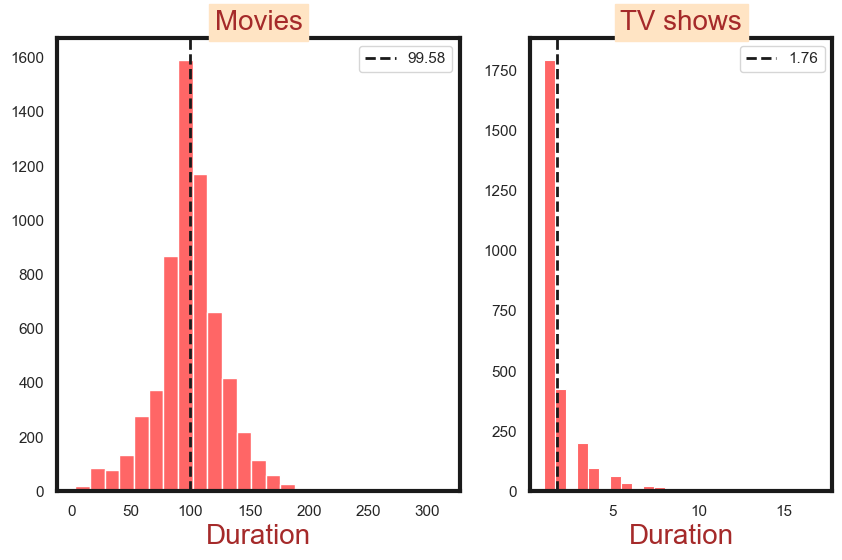

In [136]:
# Removing grid
sns.set_style("whitegrid", {'axes.grid' : False})

f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[4, 3]),dpi=100)

# plot 1 for movies & plot 2 for TV shows
p1 = sns.histplot(data=is_movie,ax=axs[0], x='duration',bins=25,color='red',alpha=0.6)
p2 = sns.histplot(data=is_show,ax=axs[1], x='duration',bins=25,color='red',alpha=0.6)

axs[0].axvline(x=is_movie['duration'].mean(),color='k',linestyle='--', linewidth=2)
axs[1].axvline(x=is_show['duration'].mean(),color='k',linestyle='--', linewidth=2)

# To show mean as legend
axs[0].legend({round(is_movie['duration'].mean(),2)})
axs[1].legend({round(is_show['duration'].mean(),2)})

# Labels & labels design
p1.set_xlabel('Duration',size=20,color='brown')
p1.set_ylabel(None)
p2.set_xlabel('Duration',size=20,color='brown')
p2.set_ylabel(None)

# titles
p1.set_title('Movies',fontsize = 20, color='brown',backgroundcolor ='bisque')
p2.set_title('TV shows',fontsize = 20, color='brown',backgroundcolor ='bisque')

# for left plot
for axis in ['bottom','left','top','right']:
    axs[0].spines[axis].set_linewidth(3)
    axs[0].spines[axis].set_color("k")    
    
# for right plot    
for axis in ['bottom','left','top','right']: 
    axs[1].spines[axis].set_linewidth(3)
    axs[1].spines[axis].set_color("k")        
;

From above histograms we can see that:<br>
- The first distribution (for movies) is approximately normal,mean is **99.5** and it means that in average movie duration is 99.5 minute<br>
- The second distribution (for TV shows) is positively skewed(there are more 1 season tv shows, then 2,...), the mean is **1.76** and it means that in average tv shows duration is 1.76(1 or 2 seasons) minute<br>


# 6.Find at least 5 more insights. Visualize with seaborn figure level OR axis level approach (3 points).

**Most tv shows and movies by year**

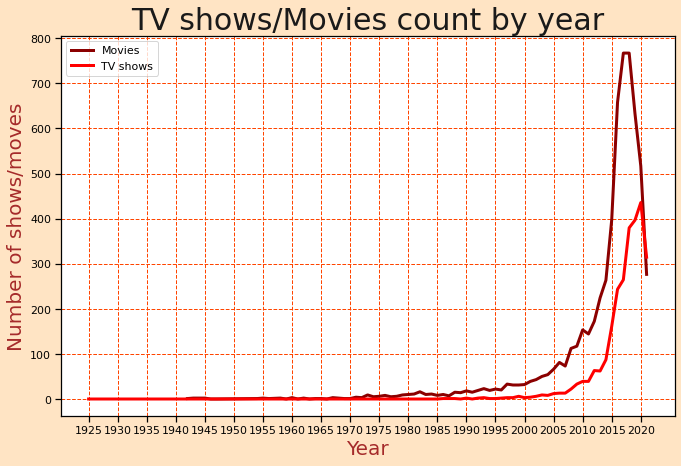

In [15]:
# separating data to movies and tv shows
is_movie =  df.loc[df['type'] == 'Movie']
is_show =  df.loc[df['type'] == 'TV Show']

# counting movies and tv shows by year
y_m = is_movie['show_id'].groupby(df['release_year']).count().reset_index()
y_s = is_show['show_id'].groupby(df['release_year']).count().reset_index()

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'black','axes.grid': True,
                     'axes.labelcolor': 'brown','figure.facecolor': 'bisque','grid.color': 'orangered',
                     'grid.linestyle': '--','axes.spines.right': True}):
    
    fig, ax = plt.subplots(figsize=(11, 7))
  
    sns.lineplot(data=y_m,x='release_year',y='show_id',color='darkred',linewidth=3)
    sns.lineplot(data=y_s,x='release_year',y='show_id',color='red',linewidth=3)


    ax.set_ylabel('Number of shows/moves',size=20)
    ax.set_xlabel('Year',size=20)
    ax.set_title('TV shows/Movies count by year',color='k',fontsize = 30)
    plt.legend(labels=["Movies","TV shows"])
    
    
    ax.set_xticks(range(1925,2025,5))
    ;


From  above we see that in 2015-2019, the number of movies started to increase in comparison with the number of TV shows, after which the number of films decreased again, equaling the number of TV shows for a year.

---------------------------------------------------------------------------------------------------------------------------<br>
From 3 exsersize we see that the most popular countries are **US** and **India**. Now let's see US and Indian movies and tv shows numbers by year.

In [16]:
us =  df.loc[df['country'] == 'United States'] # choosing rows where country is US
ind =  df.loc[df['country'] == 'India']  # choosing rows where country is India

# Separating movies and tv shows for US
is_us_movie =  us.loc[us['type'] == 'Movie']
is_us_show =  us.loc[us['type'] == 'TV Show']

# Counting how many movies and tv shows are there for each year for US.
y_us_m = is_us_movie['show_id'].groupby(is_us_movie['release_year']).count().reset_index()
y_us_s = is_us_show['show_id'].groupby(is_us_show['release_year']).count().reset_index()

# Separating movies and tv shows for India
is_ind_movie =  ind.loc[ind['type'] == 'Movie']
is_ind_show =  ind.loc[ind['type'] == 'TV Show']

# Counting how many movies and tv shows are there for each year for India.
y_ind_m = is_ind_movie['show_id'].groupby(is_ind_movie['release_year']).count().reset_index()
y_ind_s = is_ind_show['show_id'].groupby(is_ind_show['release_year']).count().reset_index()

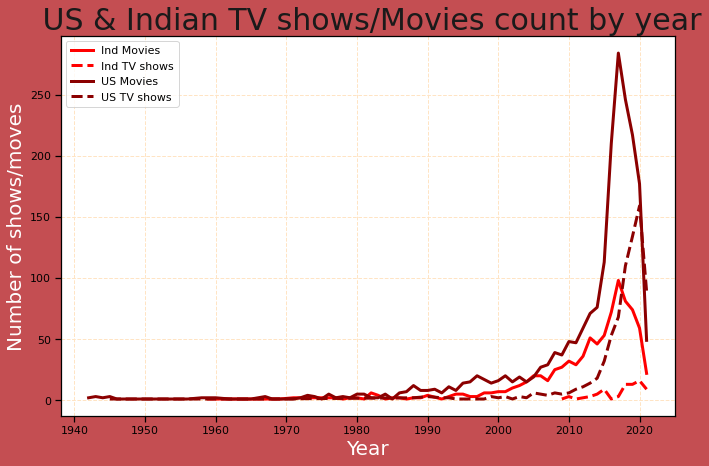

In [20]:
with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'black','axes.grid': True,
                     'axes.labelcolor': 'white','figure.facecolor': 'r','grid.color': 'bisque',
                     'grid.linestyle': '--','axes.spines.right': True}):
    
    fig, ax = plt.subplots(figsize=(11, 7))
  
    sns.lineplot(data=y_ind_m,x='release_year',y='show_id',color='red',linewidth=3)
    sns.lineplot(data=y_ind_s,x='release_year',y='show_id',color='red',linewidth=3,linestyle='--')
    sns.lineplot(data=y_us_m,x='release_year',y='show_id',color='darkred',linewidth=3)
    sns.lineplot(data=y_us_s,x='release_year',y='show_id',color='darkred',linewidth=3,linestyle='--')


    ax.set_ylabel('Number of shows/moves',size=20)
    ax.set_xlabel('Year',size=20)
    ax.set_title(' US & Indian TV shows/Movies count by year',color='k',fontsize = 30)
    plt.legend(labels=["Ind Movies","Ind TV shows","US Movies","US TV shows"])
    
    ;


TV shows are in India since 2009, although their number is small and there is no significant growth trend.The US follows a global trend both in terms of movies and TV shows.

----------------------------------------------------------------------------------------<br>
Let's see which ratings are popular:

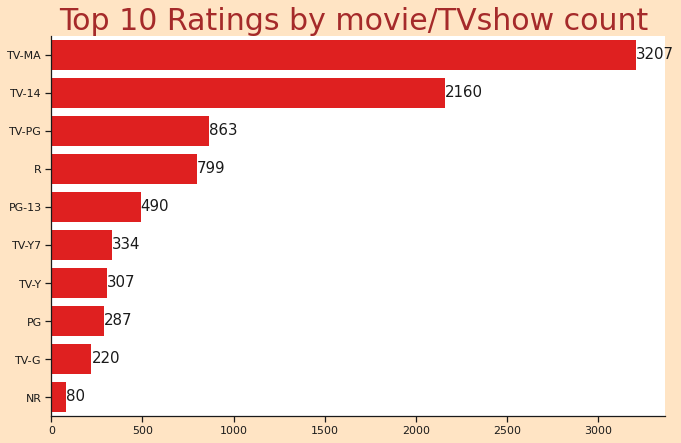

In [31]:
with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'k','ytick.color': 'k','axes.spines.right': False,
                      'axes.spines.top': False,'figure.facecolor': 'bisque'}):

    
    fig, ax = plt.subplots(figsize=(11, 7))
    
    #countplot of top 10 raings
    sns.countplot(y='rating',data=df,order=df['rating'].value_counts().iloc[:10].index ,color='red')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 Ratings by movie/TVshow count ',color='brown',fontsize = 30)    

From above we can see that the most popular ratings are:<br>
1. TV-MA<br> 
2. TV-14<br>
3. TV-PG

----------------------------------------------------------------------<br>
Let's see top popular countries by movies and tv shows counted separately:

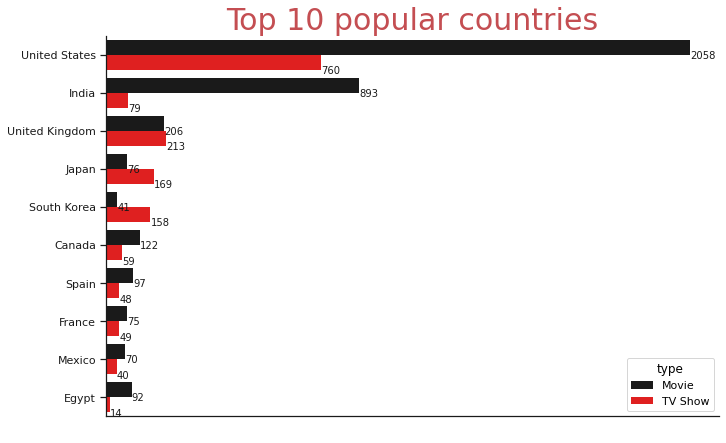

In [38]:
col = ['k','red','white','r','indianred'] # creating color palette
with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'white','ytick.color': 'k','axes.spines.right': False,
                      'axes.spines.top': False}):
    
    fig, ax = plt.subplots(figsize=(11, 7))

    sns.countplot(y='country',data=df,order=df['country'].value_counts().iloc[:10].index ,palette=col,hue='type')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10,color ='k')
    sns.set(font_scale = 1)
    
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 popular countries',color='r',fontsize = 30)    ;

From above we see that there are more Japanese,UK and Korean TV shows than movies.So we can say that in this countries(or TV shows by this countries) TV shows are more popular.

----------------------------------------------------------------------------------------<br>
Now let's see which movies (by duration) are the most popular?

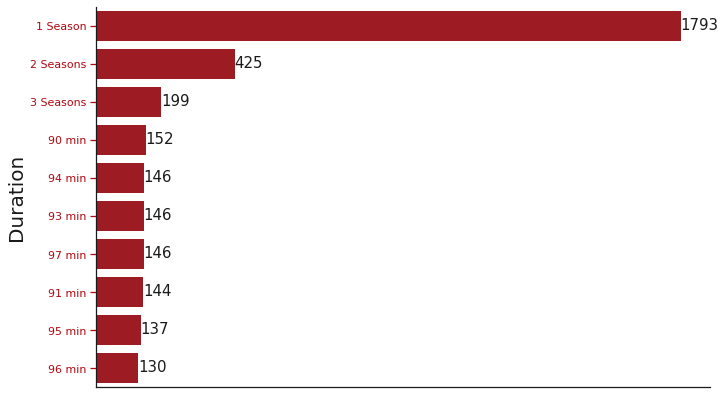

In [40]:

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'white','ytick.color': '#b20710','axes.spines.right': False,
                      'axes.spines.top': False}):
   
    fig, ax = plt.subplots(figsize=(11, 7))

    sns.countplot(y='duration',data=df,order=df['duration'].value_counts().iloc[:10].index ,color='#b20710')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    ax.set_ylabel('Duration',color='k',size=20)
    ax.set_xlabel(None)
   

Most movies are those that have 1 season.

------------------------------------------------------------------------------------------------------------------<br>
Let's see which genre of movies are the most popular?

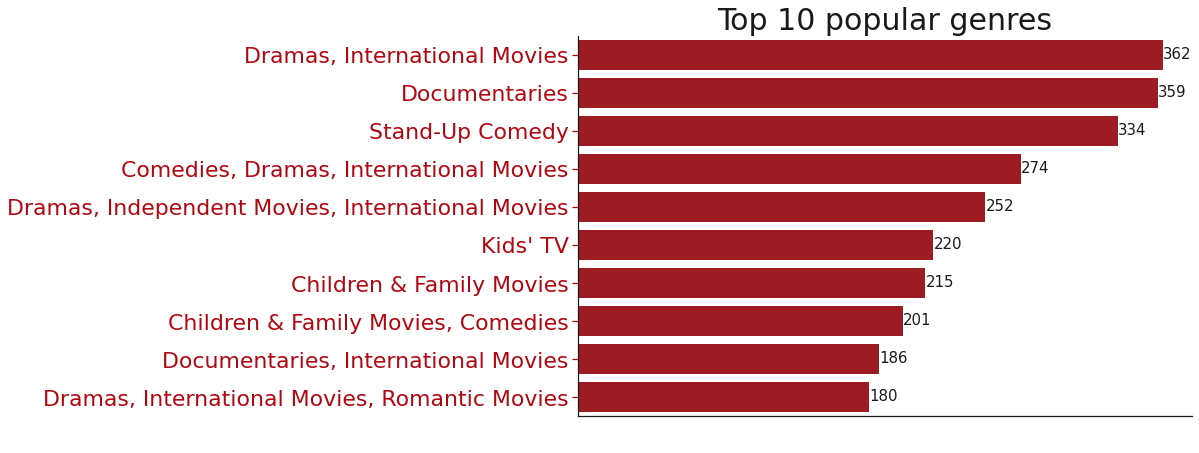

In [49]:

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'white','ytick.color': '#b20710','axes.spines.right': False,
                      'axes.spines.top': False}):

    
    fig, ax = plt.subplots(figsize=(11, 7))

    sns.countplot(y='listed_in',data=df,order=df['listed_in'].value_counts().iloc[:10].index ,color='#b20710')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    sns.set(font_scale = 1)
        
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 popular genres',color='k',fontsize = 30)    

From above countplot we see that most of the movies/ TV shows are:<br>
1. Dramas, International Movies
2. Documentaries
3. Stand-Up comedy

Let's go deep and see in which countrys Dramas number is high?

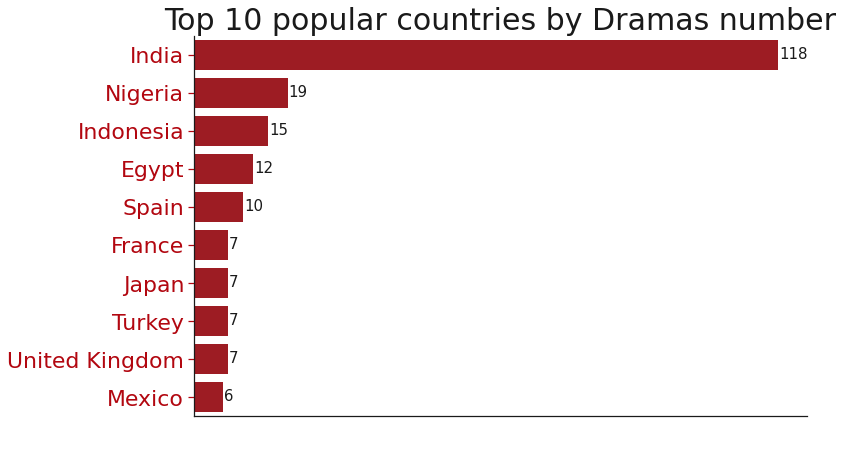

In [55]:
# choosing rows from our data where listed_in is Dramas
df_dr = df.loc[df['listed_in'] == 'Dramas, International Movies'] 

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'white','ytick.color': '#b20710','axes.spines.right': False,
                      'axes.spines.top': False}):

    
    fig, ax = plt.subplots(figsize=(11, 7))

    sns.countplot(y='country',data=df_dr,order=df_dr['country'].value_counts().iloc[:10].index ,color='#b20710')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    sns.set(font_scale = 3) 
    
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 popular countries by Dramas number',color='k',fontsize = 30)    


**Dramas** are most popular in **India**(or Indian dramas are most populars)

----------------------------------------------------------------------------------------------------------------<br>
Now let's see in which countrys Stand-Up Comedy number is high?

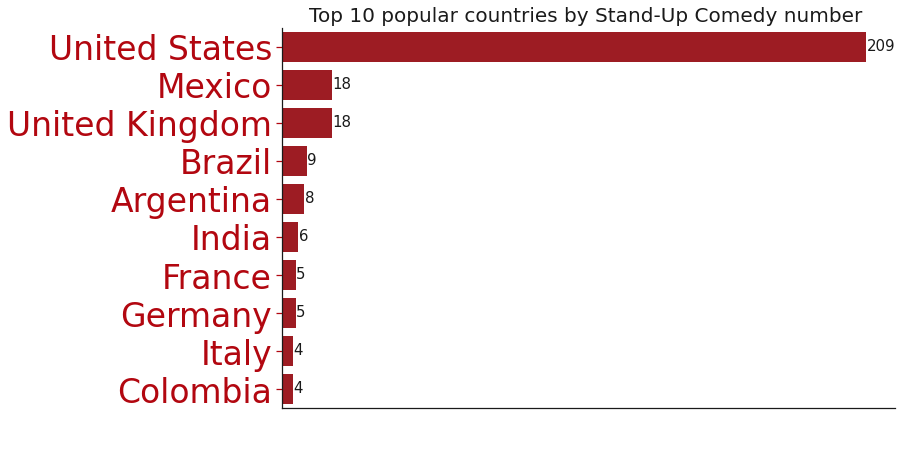

In [59]:
df_com = df.loc[df['listed_in'] == 'Stand-Up Comedy'] 

with sns.axes_style({'axes.facecolor': 'white','axes.edgecolor': 'k',
                     'axes.grid': False,'axes.labelcolor': 'brown','axes.spines.right': True,
                      'xtick.color': 'white','ytick.color': '#b20710','axes.spines.right': False,
                      'axes.spines.top': False}):

    
    fig, ax = plt.subplots(figsize=(11, 7))

    sns.countplot(y='country',data=df_com,order=df_com['country'].value_counts().iloc[:10].index ,color='#b20710')

    for i in ax.patches:
        ax.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 15,color ='k')
        
    sns.set(font_scale = 3)  
    
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title('Top 10 popular countries by Stand-Up Comedy number ',color='k',fontsize = 20)    

**Stand-Up Comedes** are most popular in **US**(or US Stand-Up Comedes are most populars)

# 7. Have a final summary of your insights. Based on your insights, write suggestions to the Netflix business team. Help them to make better decisions based on your suggestions. (2 points)

Finnaly we can say:<br>
1. Netflix released the most tv shows or movies in **2018** (1147 tv shows/movies).It was the best year.   <br>  
2. 2015-2019, the number of movies started to increase in comparison with the number of TV shows, after which the number of films decreased again, equaling the number of TV shows for a year.So this period was the best for movies.<br>
3. Most popular 2 countries are India and US.<br>
4. There are countries (Japane,UK and Korea) that have more TV shows than movies.So we can say that in this countries(or TV shows by this countries) TV shows are more popular.<br>
5. In average movie duration is 99.5 minute, and tv shows duration is 1.76.<br>
6. The most popular duration is 1 season<br>
7. The most popular ratings are:TV-MA,TV-14,TV-PG<br>
8. Most of the movies/ TV shows are Dramas, Documentaries, Stand-Up comedy <br>
9. Most popular country by dorams number is India and by Stand-Up comedy numbers is US<br>
<br>-------------------------------------------------------------------------------------------------------------------
<br>
**Suggestions**<br>
To increase number of popular movies and TV shows:<br>
- Number of Indian and US movies and TV shows
- Number of Indian Dorams and US Stand-Up comedys
- Number of Japanese,UK and Korean TV shows(in this countries TV shows are more popular then movies )
- Number of 1 season TV shows
- Number of movies/TV shows that have TV-MA,TV-14,TV-PG ratings
- ...
